In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from meteo_pkg.loader import MeteoLoader

In [2]:
# según yo se podía mandar el df directo al heatmap JAJA
plt.figure(figsize=(10,6))
sns.heatmap(df["To"])
plt.title("Heatmap temperatura")  # obvio explota porque no es 2D
plt.show()


NameError: name 'df' is not defined

<Figure size 1000x600 with 0 Axes>

In [3]:
loader = MeteoLoader("../data/processed/datos_renombrados.parquet")
df = loader.df
pivot = df.pivot(index="TMESTAMP", columns="hora", values="To")
sns.heatmap(pivot)

KeyError: 'TMESTAMP'

In [4]:
# Intento raro donde quise agrupar por bins de 3 horas
df["h_bin"] = pd.cut(df.index.hour, bins=8)
pivot = df.pivot_table(index="h_bin", columns="fecha", values="To")
sns.heatmap(pivot)

KeyError: 'fecha'

In [5]:
def mapa_calor(df, columna="To", regresar_df=False):
    """
    Genera un mapa de calor de una columna especificada
    """

    datos = df[[columna]].copy()
    datos["fecha"] = datos.index.date
    datos["hora"] = datos.index.hour

    pivot = datos.pivot_table(index="hora", columns="fecha", values=columna, aggfunc="mean")

    plt.figure(figsize=(18, 10))
    sns.heatmap(pivot, cmap="viridis")
    plt.title(f"Heatmap {columna}")
    plt.xlabel("Día")
    plt.ylabel("Hora del día")
    plt.tight_layout()
    plt.show()
    
    if regresar_df:
        return pivot


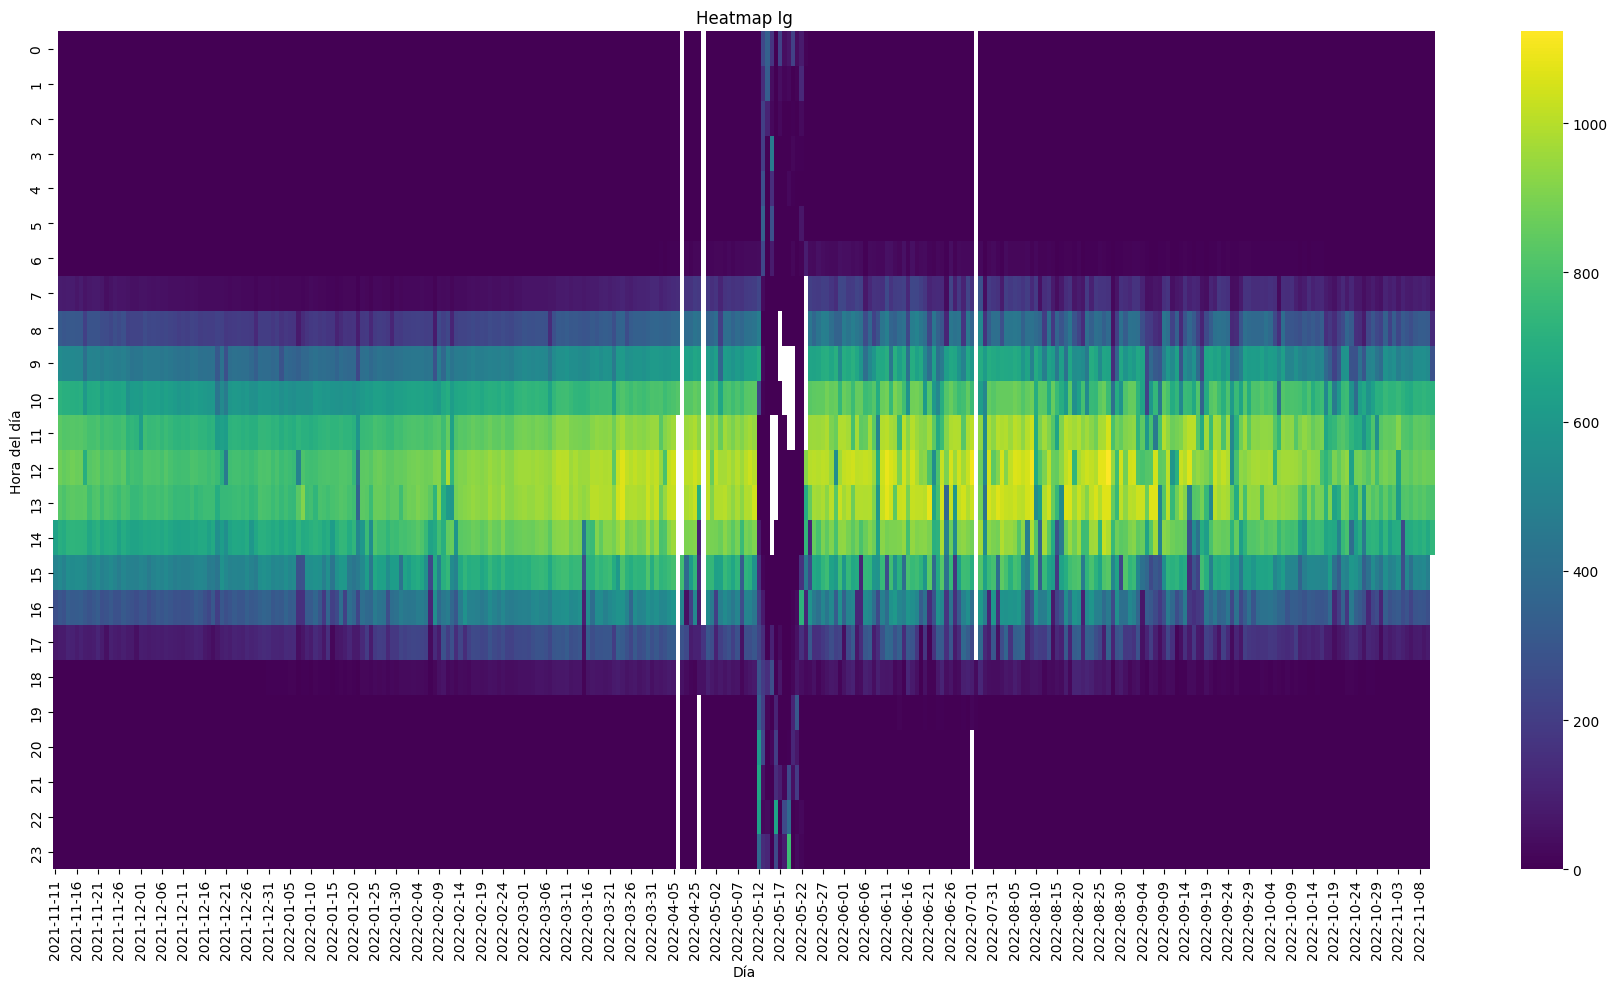

fecha,2021-11-11,2021-11-12,2021-11-13,2021-11-14,2021-11-15,2021-11-16,2021-11-17,2021-11-18,2021-11-19,2021-11-20,...,2022-11-02,2022-11-03,2022-11-04,2022-11-05,2022-11-06,2022-11-07,2022-11-08,2022-11-09,2022-11-10,2022-11-11
hora,,,,,,,,,,,,,,,,,,,,,
0,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.016000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.016333,0.000000,0.000000,0.000000,0.000000
2,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,NaN,0.561500,0.499167,0.576333,0.580667,0.507833,0.346500,1.676833,0.284500,0.295167,...,2.305333,1.093500,2.032500,1.365333,1.447833,1.310167,2.642667,1.385833,1.225833,1.018333
7,NaN,87.683333,79.546667,84.018333,86.795000,68.346667,86.055000,59.756667,73.963333,77.405000,...,102.046667,65.016667,101.286667,80.858333,78.603333,95.928333,88.436667,101.200000,89.933333,49.950000
8,NaN,311.800000,298.983333,304.783333,308.100000,303.733333,305.316667,214.216667,286.150000,288.850000,...,329.416667,241.116667,318.083333,295.616667,263.583333,310.350000,327.533333,327.166667,317.100000,134.500000


In [6]:
loader = MeteoLoader("../data/processed/datos_renombrados.parquet")
df = loader.df

mapa_calor(df, "Ig", regresar_df=True) 